In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
def factor(df, ema_period=20, atr_period=10, multiplier=2):
    '''凯尔特纳通道：基于ATR的波动通道'''
    ema = df['close'].ewm(span=ema_period, adjust=False).mean()
    
    # 计算ATR
    high_low = df['high'] - df['low']
    high_close = abs(df['high'] - df['close'].shift(1))
    low_close = abs(df['low'] - df['close'].shift(1))
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = true_range.ewm(span=atr_period, adjust=False).mean()
    
    # 计算通道宽度
    channel_width = multiplier * atr
    
    factor = (df['close'] - (ema + channel_width)) / (2 * channel_width)
    
    return factor

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.013308
   Rank_IC (Spearman): -0.036981
📊 信息比率:
   IR: 0.595951
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131035
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------


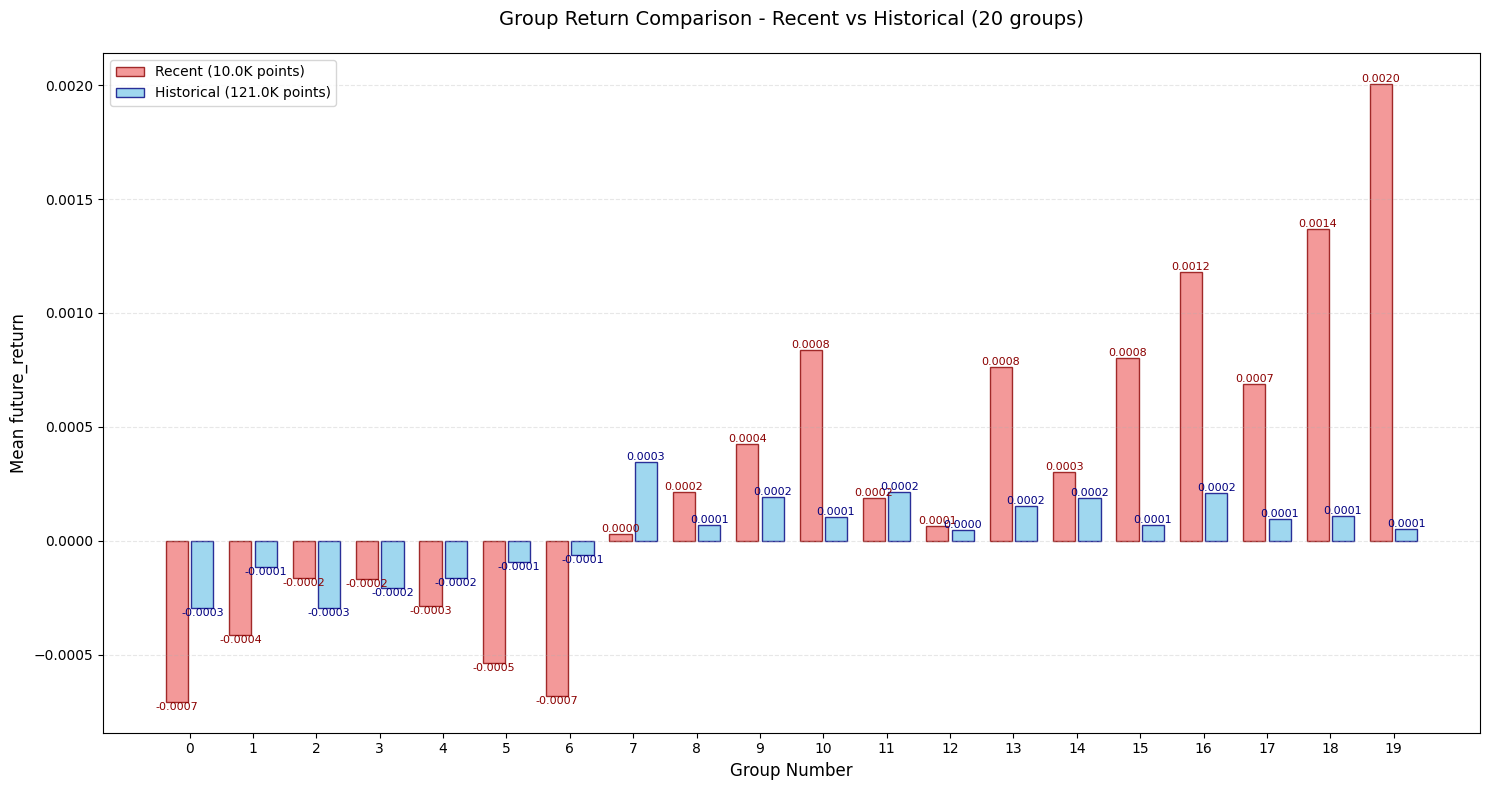

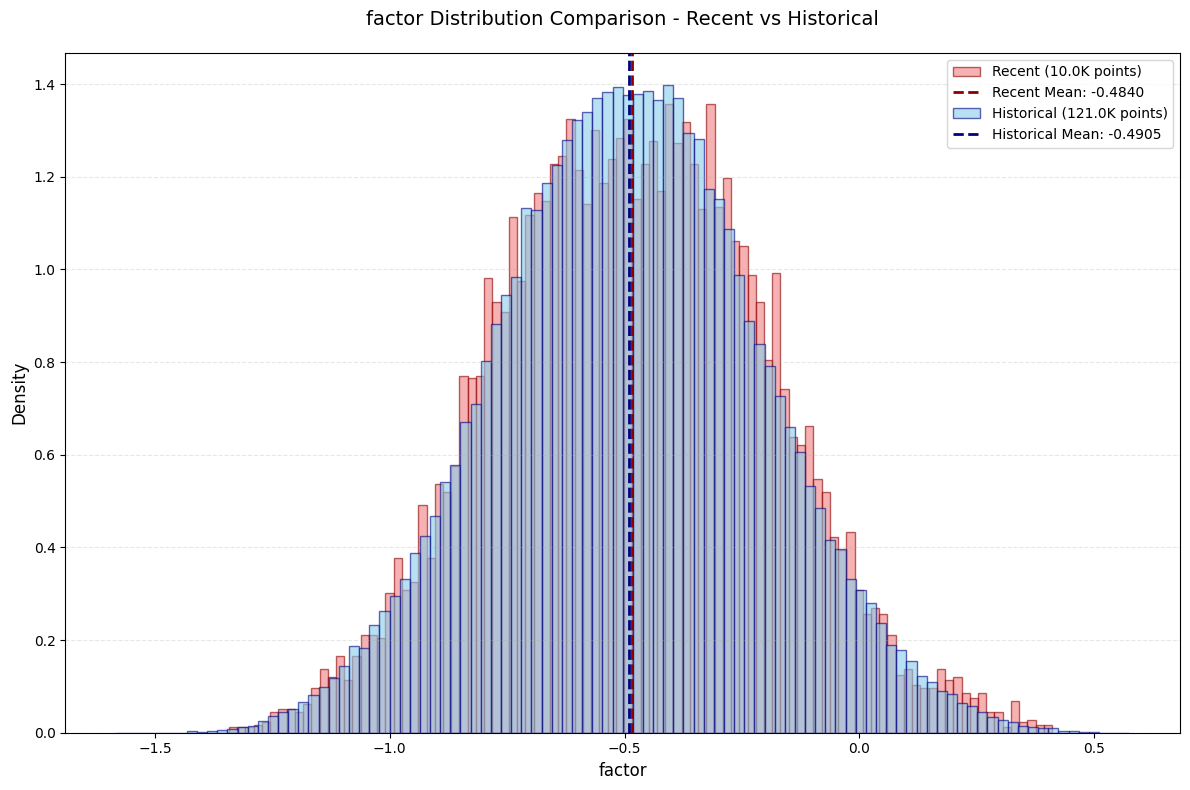

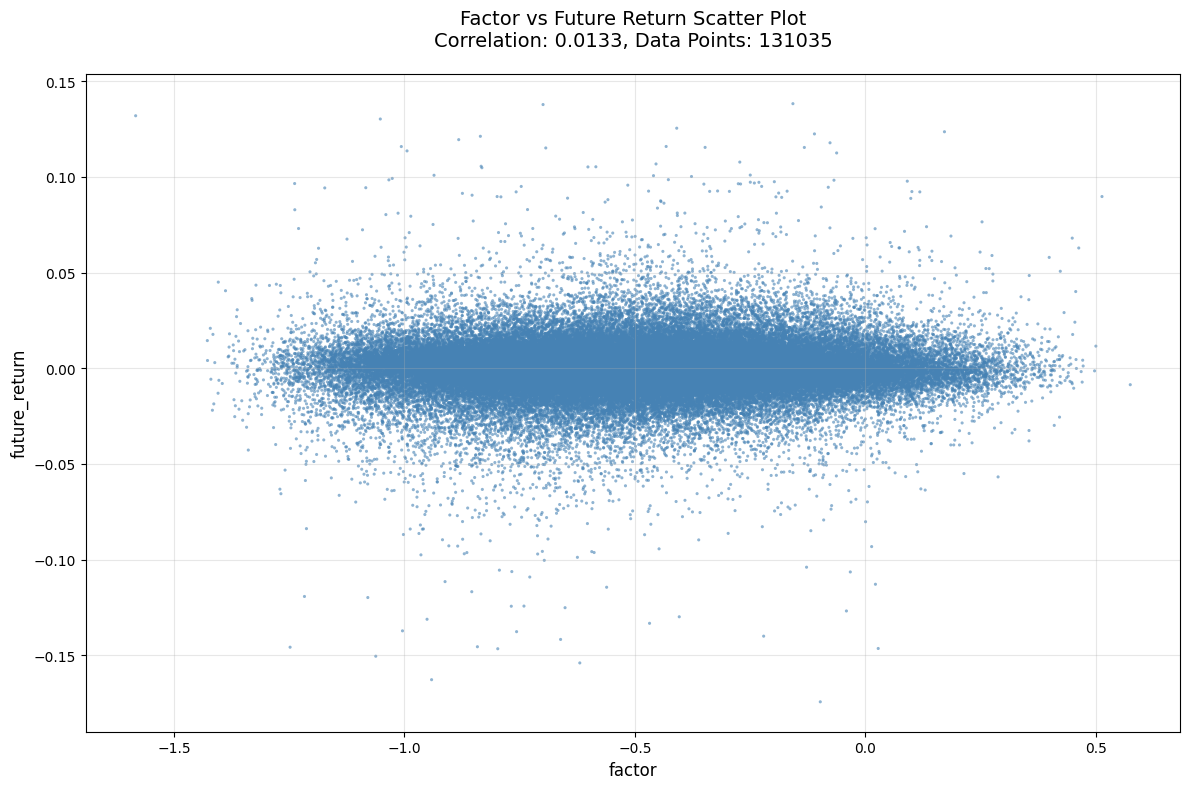

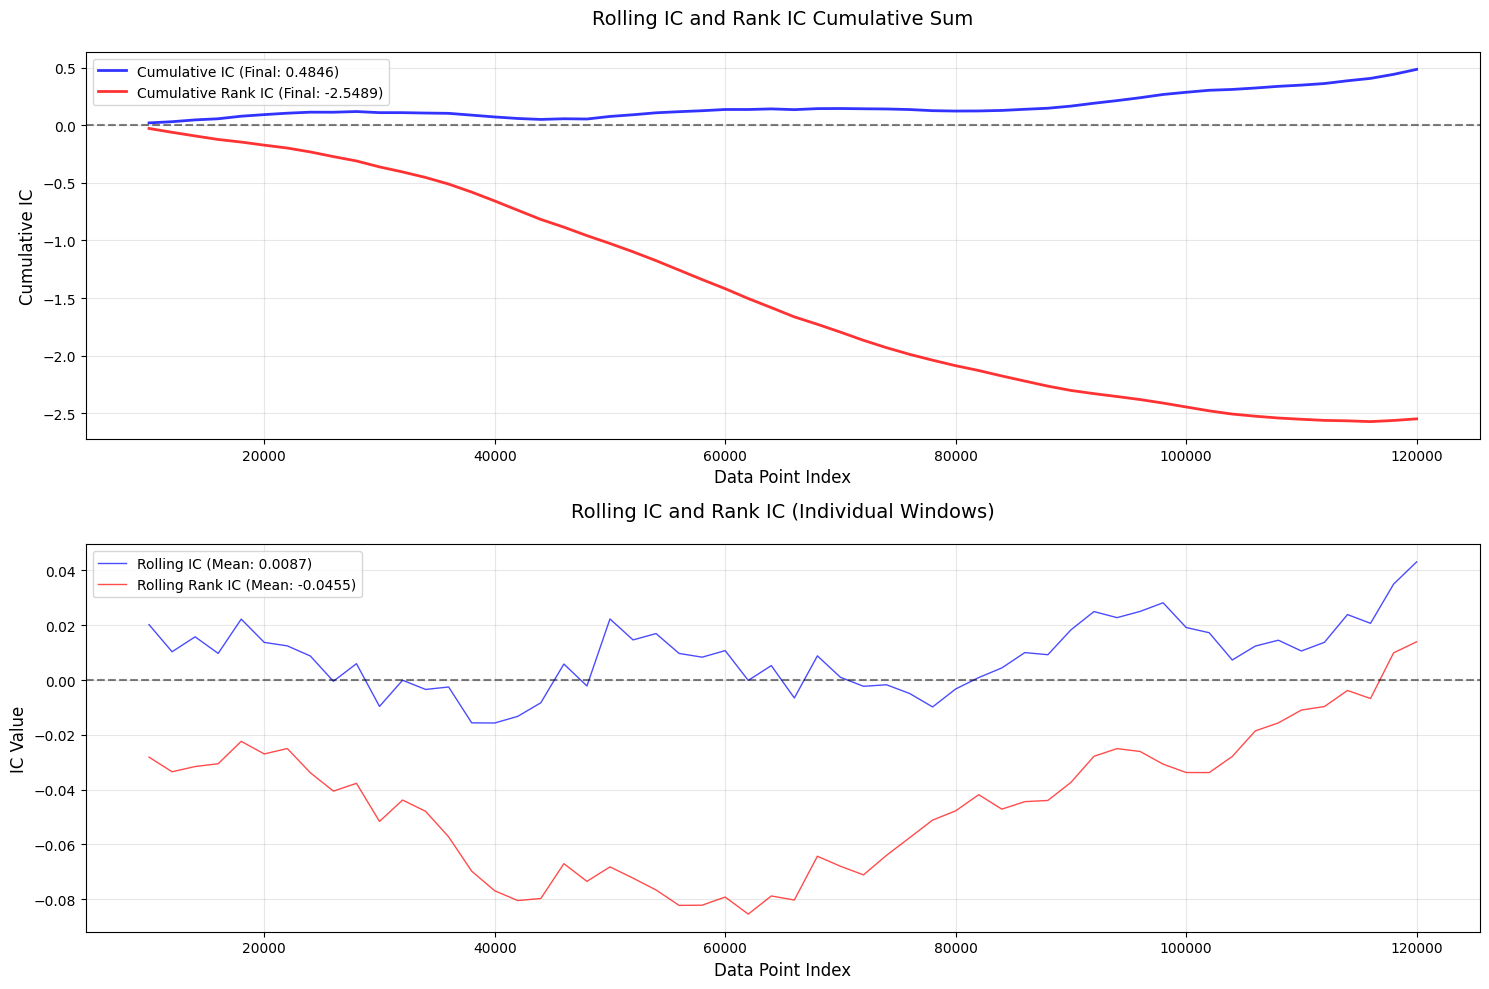

✅ 已显示 4 个图片
----------------------------------------


In [5]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

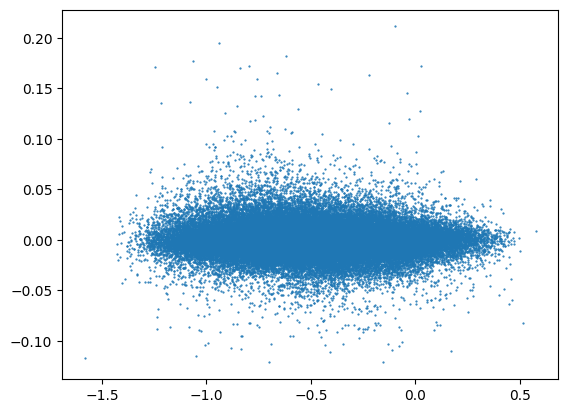

In [6]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [7]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.002979279504724392,
 0.012378785358627619,
 0.005615560230016251,
 0.01873799664491824,
 0.005769923352783837,
 0.0007742919632999729,
 0.009450623463161976,
 -0.00066728568852522,
 -0.012240176251087401,
 0.017164975239722352]

In [8]:
print(result)

{'correlation_analysis': {'IC': 0.013308138828965924, 'Rank_IC': -0.03698060048606029}, 'information_ratio': {'IR': 0.5959510947418013, 'group_correlations': [-0.002979279504724392, 0.012378785358627619, 0.005615560230016251, 0.01873799664491824, 0.005769923352783837, 0.0007742919632999729, 0.009450623463161976, -0.00066728568852522, -0.012240176251087401, 0.017164975239722352], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -1.5830  -0.9509   -1.0585      -0.0003      0.0158   6552
1      -0.9509  -0.8483   -0.8954      -0.0001      0.0135   6552
2      -0.8483  -0.7811   -0.8131      -0.0003      0.0127   6552
3      -0.7811  -0.7277   -0.7538      -0.0001      0.0120   6551
4      -0.7277  -0.6824   -0.7047      -0.0002      0.0118   6552
5      -0.6824  -0.6401   -0.6611      -0.0001      0.0112   6552
6      -0.6401  -0.6018   -0.6207      